# Exploración de datos

## 1. Leyendo datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install jsonlines

In [3]:
import jsonlines
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path = '/content/drive/MyDrive/prueba_tecnica_bancolombia/Prueba practica/2020_acl_diplomacy/data/'
with jsonlines.open(data_path+'train.jsonl', 'r') as reader:
    train = list(reader)
with jsonlines.open(data_path+'validation.jsonl', 'r') as reader:
    valid = list(reader)
with jsonlines.open(data_path+'test.jsonl', 'r') as reader:
    test = list(reader)

In [5]:
#change the format from list of lists into a single list
def aggregate(dataset):
    '''Función que convierte los datos a formato para entrenamiento
    '''
    messages = []
    rec = []
    send = []
    power = []
    for dialogs in dataset:
        messages.extend(dialogs['messages'])
        rec.extend(dialogs['receiver_labels'])
        send.extend(dialogs['sender_labels'])
        #ONLY FOR POWER VERSION
        power.extend(dialogs['game_score_delta'])
    #print(len(rec), len(send), len(messages))
    merged = []
    for i, item in enumerate(messages):
        merged.append({'message':item, 'sender_annotation':send[i],
                        'receiver_annotation':rec[i], 'score_delta':int(power[i])})
    return merged

In [6]:
#only used for getting lie/not lie labels
data_train = aggregate(train)
data_val   = aggregate(valid)
data_test  = aggregate(test)

In [7]:
len(data_train),len(data_val), len(data_test)

(13132, 1416, 2741)

In [8]:
data_train[110]

{'message': "Okay, Italy. I won't share any of this conversation. But in the interest of continued full disclosure, here's what I think: England is a greater threat to *me* on the map, but *you* have a greater chance of soloing this game quickly, or pair-winning with Austria even sooner. And if I continue to collaborate with England, we at least have a chance of slowing that down. So I'm in sort of a conflicted spot",
 'sender_annotation': True,
 'receiver_annotation': True,
 'score_delta': -3}

In [9]:
df_train = pd.DataFrame(data_train)
df_train['set'] = 'train'

df_val   = pd.DataFrame(data_val)
df_val['set'] = 'val'

df_test  = pd.DataFrame(data_test)
df_test['set'] ='test'

In [10]:
df_total = pd.concat([df_train,df_val,df_test])

In [11]:
df_train.head(5)

,message,sender_annotation,receiver_annotation,score_delta,set
0,Germany!\n\nJust the person I want to speak wi...,True,True,0,train
1,"You've whet my appetite, Italy. What's the sug...",True,True,0,train
2,👍,True,True,0,train
3,It seems like there are a lot of ways that cou...,True,True,0,train
4,"Yeah, I can’t say I’ve tried it and it works, ...",True,NOANNOTATION,0,train


In [12]:
df_val.head(5)

,message,sender_annotation,receiver_annotation,score_delta,set
0,"Good afternoon to our friends in the south, ju...",True,True,0,val
1,Of course! I thank you very much. The future o...,True,True,0,val
2,"Well, should the French turn out to be a thorn...",True,True,0,val
3,Greetings from new Italy!,True,True,0,val
4,Would just like to reiterate that Italy would ...,True,True,0,val


In [13]:
df_test.head(5)

,message,sender_annotation,receiver_annotation,score_delta,set
0,"Hi Italy! Just opening up communication, and I...",True,True,0,test
1,"Well....that's a great question, and a lot of ...",True,True,0,test
2,"Well, if you want to attack France in the Medi...",True,False,0,test
3,"Hello, I'm just asking about your move to Tyro...",True,True,1,test
4,Totally understandable - but did you notice th...,True,False,-1,test


In [14]:
df_train['sender_annotation'].value_counts()

True     12541
False      591
Name: sender_annotation, dtype: int64

In [15]:
df_train['receiver_annotation'].value_counts()

True            11459
NOANNOTATION     1107
False             566
Name: receiver_annotation, dtype: int64

In [16]:
df_val['sender_annotation'].value_counts()

True     1360
False      56
Name: sender_annotation, dtype: int64

In [17]:
df_val['receiver_annotation'].value_counts()

True            1236
NOANNOTATION     133
False             47
Name: receiver_annotation, dtype: int64

In [18]:
df_test['sender_annotation'].value_counts()

True     2501
False     240
Name: sender_annotation, dtype: int64

In [19]:
df_test['receiver_annotation'].value_counts()

True            2310
NOANNOTATION     266
False            165
Name: receiver_annotation, dtype: int64

In [20]:
df_total['sender_annotation'].value_counts()

True     16402
False      887
Name: sender_annotation, dtype: int64

In [21]:
df_total['receiver_annotation'].value_counts()

True            15005
NOANNOTATION     1506
False             778
Name: receiver_annotation, dtype: int64

In [22]:
df_total.shape

(17289, 5)

## 2. Análisis de datos

In [23]:
df_total.head(2)

,message,sender_annotation,receiver_annotation,score_delta,set
0,Germany!\n\nJust the person I want to speak wi...,True,True,0,train
1,"You've whet my appetite, Italy. What's the sug...",True,True,0,train


In [24]:
df_train['cantidad_palabras'] = df_train['message'].str.split(" ").apply(len)

In [25]:
df_train['cantidad_palabras'].describe()

count    13132.000000
mean        20.866509
std         22.373810
min          1.000000
25%          7.000000
50%         14.000000
75%         27.000000
max        292.000000
Name: cantidad_palabras, dtype: float64

In [26]:
df_total['cantidad_palabras'] = df_total['message'].str.split(" ").apply(len)

In [27]:
df_total['receiver_annotation'].value_counts()

True            15005
NOANNOTATION     1506
False             778
Name: receiver_annotation, dtype: int64

In [28]:
df_total['receiver_annotation'].value_counts(normalize=True)*100

True            86.789288
NOANNOTATION     8.710741
False            4.499971
Name: receiver_annotation, dtype: float64

## Eliminando registros con NOANNOTATION

se Elimna aproximadamente el 9% de los datos originales

In [29]:
df_total_filtrado = df_total[df_total['receiver_annotation']!='NOANNOTATION']

### Conversión de variable objetivo a números

In [30]:
diccionario_binarizacion_variable_respuesta = {True:1, False:0}

df_total_filtrado['receiver_annotation'] = (df_total_filtrado['receiver_annotation']
                                          .map(diccionario_binarizacion_variable_respuesta))
df_total_filtrado['sender_annotation'] = (df_total_filtrado['sender_annotation']
                                          .map(diccionario_binarizacion_variable_respuesta))

<ipython-input-30-5165e39d8299>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_filtrado['receiver_annotation'] = (df_total_filtrado['receiver_annotation']
<ipython-input-30-5165e39d8299>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_filtrado['sender_annotation'] = (df_total_filtrado['sender_annotation']


In [31]:
df_total_filtrado.head(2)

,message,sender_annotation,receiver_annotation,score_delta,set,cantidad_palabras
0,Germany!\n\nJust the person I want to speak wi...,1,1,0,train,84
1,"You've whet my appetite, Italy. What's the sug...",1,1,0,train,8


### Distribución de registros

<Axes: xlabel='sender_annotation', ylabel='count'>

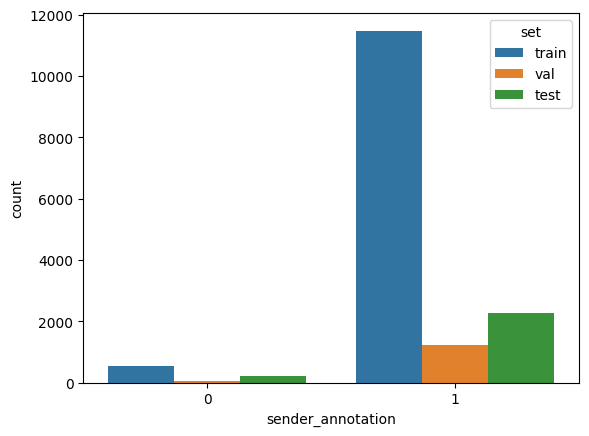

In [32]:

sns.countplot(data=df_total_filtrado,
              x='sender_annotation',hue='set')

<Axes: xlabel='receiver_annotation', ylabel='count'>

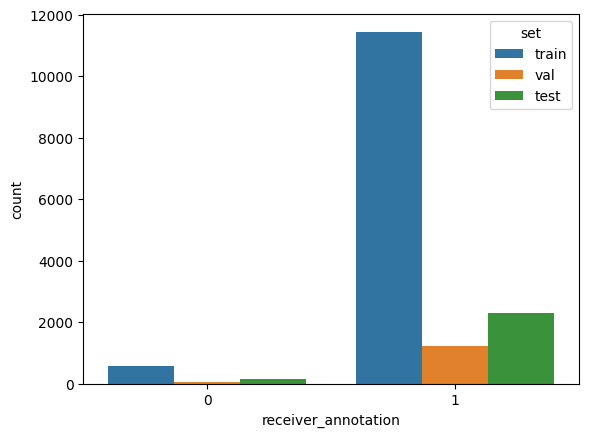

In [33]:
sns.countplot(data=df_total_filtrado,
              x='receiver_annotation',hue='set')

### Verificando distribuciones en cada conjunto de datos



In [34]:
df_total_filtrado.query("set=='train'")['sender_annotation'].value_counts(normalize=True)

1    0.954678
0    0.045322
Name: sender_annotation, dtype: float64

In [35]:
df_total_filtrado.query("set=='val'")['sender_annotation'].value_counts(normalize=True)

1    0.961029
0    0.038971
Name: sender_annotation, dtype: float64

In [36]:
df_total_filtrado.query("set=='test'")['sender_annotation'].value_counts(normalize=True)

1    0.916364
0    0.083636
Name: sender_annotation, dtype: float64

Se observa que para Sender el conjunto de test no sigue la misma distribución en cuanto a proporción a comparación del conjunto de train y validación. Esto  puede ocasionar que las métricas en el conjunto de test no representen de manera correcta el desempeño general del modelo. Posiblemente la separación de datos mediante estratificación no haya sido óptima


In [37]:
df_total_filtrado.query("set=='train'")['receiver_annotation'].value_counts(normalize=True)

1    0.952931
0    0.047069
Name: receiver_annotation, dtype: float64

In [38]:
df_total_filtrado.query("set=='val'")['receiver_annotation'].value_counts(normalize=True)

1    0.963367
0    0.036633
Name: receiver_annotation, dtype: float64

In [39]:
df_total_filtrado.query("set=='test'")['receiver_annotation'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: receiver_annotation, dtype: float64

Se observa que para Receiver el conjunto de test no sigue la misma distribución en cuanto a proporción a comparación del conjunto de train y validación. Esto  puede ocasionar que las métricas en el conjunto de test no representen de manera correcta el desempeño general del modelo. Posiblemente la separación de datos mediante estratificación no haya sido óptima

### Cantidad de palabras

In [40]:
def statistics(df,column):

    stat_dic = {'mean':df[column].mean(),
                'std':df[column].std(),
                'median':df[column].median()}

    return stat_dic

In [41]:
df_total_filtrado.columns

Index(['message', 'sender_annotation', 'receiver_annotation', 'score_delta',
       'set', 'cantidad_palabras'],
      dtype='object')

Text(0.5, 1.0, 'Cantidad de palabras en cada mensaje')

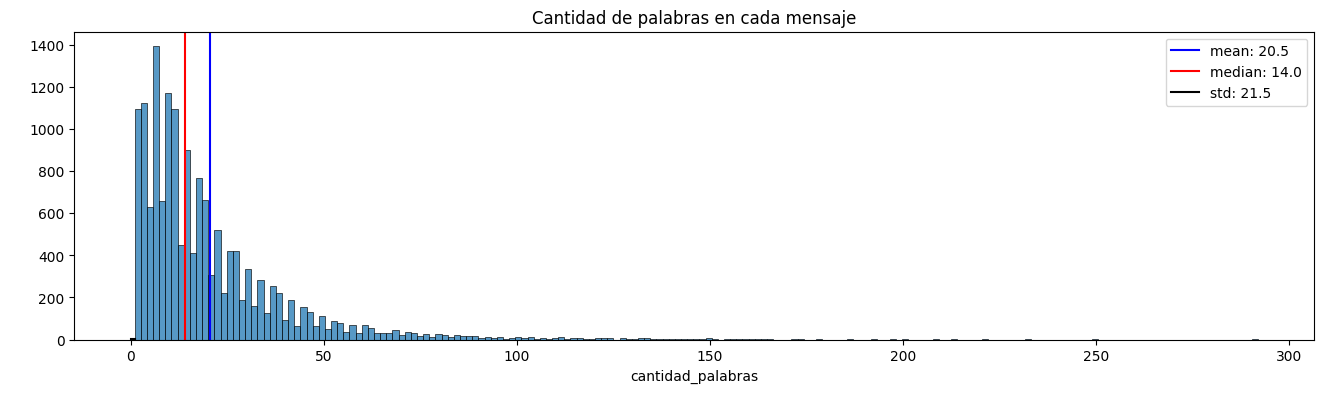

In [42]:
plt.figure(figsize= (16,4))
sns.histplot(data = df_total_filtrado, x = 'cantidad_palabras')
stat_docs = statistics(df_total_filtrado,column='cantidad_palabras')
plt.axvline(stat_docs['mean'], label = 'mean: %.1f' % stat_docs['mean'] , color = 'blue')
plt.axvline(stat_docs['median'], label = 'median: %.1f' % stat_docs['median'] , color = 'red')
plt.plot([1,1], label = 'std: %.1f' % stat_docs['std'] , color = 'black')

plt.legend()
plt.ylabel(" ")
plt.title("Cantidad de palabras en cada mensaje")

In [43]:
df_total_filtrado['cantidad_palabras'].describe()

count    15783.000000
mean        20.475068
std         21.453028
min          1.000000
25%          7.000000
50%         14.000000
75%         27.000000
max        292.000000
Name: cantidad_palabras, dtype: float64

La mayoría mitad de los registros poseen menos de 14 palabras mientras que el registro con mayor cantidad de palabras es 292. sin embargo los mensajes siguen estando en el rango de tokens para el finetune de LLM

In [44]:
df_total_filtrado.columns

Index(['message', 'sender_annotation', 'receiver_annotation', 'score_delta',
       'set', 'cantidad_palabras'],
      dtype='object')

Text(0.5, 1.0, 'Cantidad de palabras en cada mensaje')

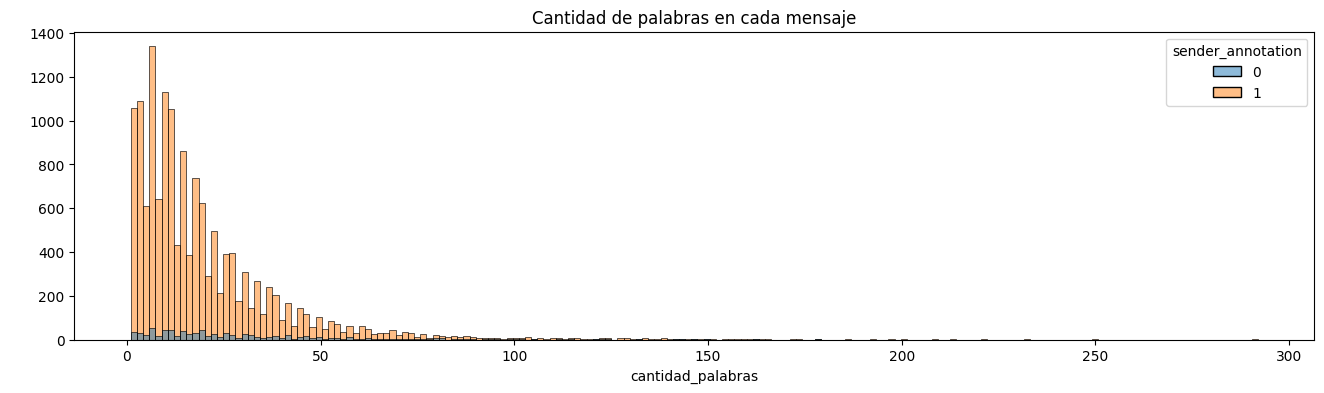

In [45]:
plt.figure(figsize= (16,4))
sns.histplot(data = df_total_filtrado, x = 'cantidad_palabras',hue='sender_annotation')
stat_docs = statistics(df_total_filtrado,column='cantidad_palabras')
# plt.axvline(stat_docs['mean'], label = 'mean: %.1f' % stat_docs['mean'] , color = 'blue')
# plt.axvline(stat_docs['median'], label = 'median: %.1f' % stat_docs['median'] , color = 'red')
# plt.plot([1,1], label = 'std: %.1f' % stat_docs['std'] , color = 'black')

plt.ylabel(" ")
plt.title("Cantidad de palabras en cada mensaje")

<Figure size 1600x400 with 0 Axes>

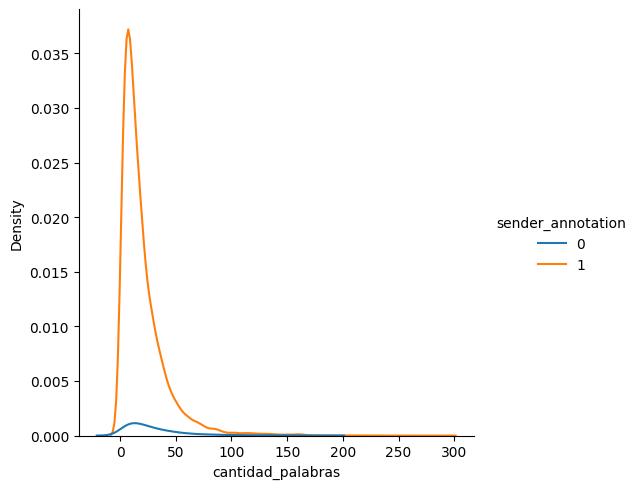

In [46]:
plt.figure(figsize= (16,4))
sns.displot(data = df_total_filtrado, x = 'cantidad_palabras',
            hue='sender_annotation', kind="kde")

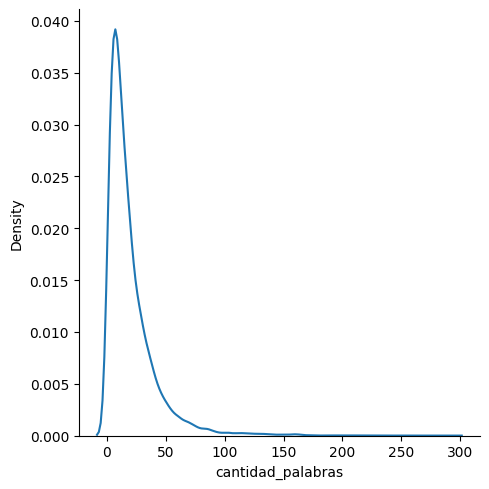

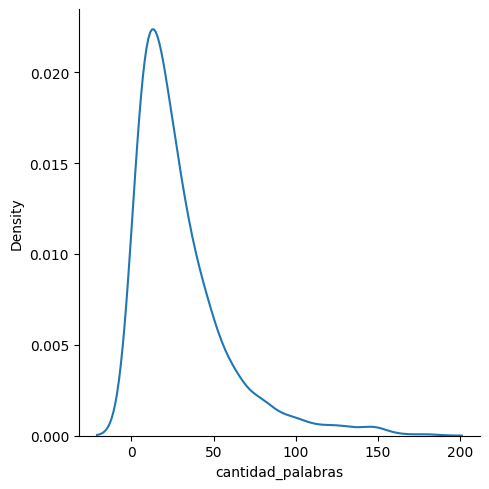

In [47]:
sns.displot(data = df_total_filtrado[df_total_filtrado['sender_annotation']==1],
            x = 'cantidad_palabras', kind="kde")
sns.displot(data = df_total_filtrado[df_total_filtrado['sender_annotation']==0],
            x = 'cantidad_palabras', kind="kde")

Se observa que los

## Palabras que más frecuentes

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from spacy.lang.en import stop_words

In [49]:
nlp = spacy.load('en_core_web_sm')

stop_words = stop_words.STOP_WORDS

In [50]:
len(stop_words)

326

In [51]:
cv = CountVectorizer(stop_words = list(stop_words) )

In [52]:
doc_term_matrix = cv.fit_transform(df_total_filtrado['message'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [53]:
df_count_words = pd.DataFrame(doc_term_matrix.toarray(),
                       columns = cv.get_feature_names_out())

df_count_words.index = df_total_filtrado.index
df_count_words.head()

,01,02,03,05,08,10,100,1000,100000,11,...,yyou,zero,zine,zone,zones,zoning,zrussia,zzzzzzzzzzz,знает,хрен
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_count_words['receiver_annotation'] = df_total_filtrado['receiver_annotation']
df_count_words['sender_annotation'] = df_total_filtrado['sender_annotation']
df_count_words.head(2)

,01,02,03,05,08,10,100,1000,100000,11,...,zine,zone,zones,zoning,zrussia,zzzzzzzzzzz,знает,хрен,receiver_annotation,sender_annotation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [55]:
 df_total_filtrado['sender_annotation'].value_counts()

1    14981
0      802
Name: sender_annotation, dtype: int64

### 20 palabras más frecuences

In [56]:
num_words = 50
df_count_words.sum(axis=0).sort_values(ascending=False).head(num_words)

receiver_annotation    15005
sender_annotation      14981
think                   1655
france                  1625
russia                  1550
italy                   1504
support                 1408
england                 1401
like                    1355
ll                      1341
austria                 1238
germany                 1212
going                   1200
don                     1172
turkey                  1030
want                    1012
good                     975
know                     815
yeah                     783
sure                     742
need                     731
fleet                    723
turn                     692
game                     692
work                     682
ve                       674
let                      656
way                      656
help                     643
build                    634
right                    591
attack                   513
north                    489
moves                    488
army          

In [57]:
df_sender_true = (
          df_count_words
        .query("sender_annotation==1")
        .sum(axis=0).sort_values(ascending=False)
        .head(num_words)
 )

df_sender_true

sender_annotation      14981
receiver_annotation    14314
france                  1514
think                   1488
italy                   1424
russia                  1416
england                 1290
support                 1289
ll                      1250
like                    1231
austria                 1159
germany                 1118
going                   1088
don                     1062
turkey                   959
want                     908
good                     902
yeah                     755
know                     747
fleet                    683
need                     678
sure                     675
turn                     629
work                     623
game                     621
ve                       615
let                      606
help                     590
way                      590
build                    578
right                    546
moves                    467
attack                   457
army                     456
north         

In [58]:
df_sender_false = (
  df_count_words
 .query("sender_annotation==0")
 .sum(axis=0).sort_values(ascending=False)
 .head(num_words)
 )

df_sender_false

receiver_annotation    691
think                  167
russia                 134
like                   124
support                119
going                  112
france                 111
england                111
don                    110
want                   104
germany                 94
ll                      91
italy                   80
austria                 79
good                    73
game                    71
turkey                  71
know                    68
sure                    67
way                     66
turn                    63
ve                      59
work                    59
attack                  56
build                   56
need                    53
help                    53
let                     50
right                   45
north                   44
alliance                44
fleet                   40
centers                 38
plan                    37
belgium                 35
trust                   33
getting                 32
s

### Analizando palabras que en común y diferenciadoras

In [59]:
#palabras diferenciadoras:
set(df_sender_true.index) - set(df_sender_false.index)

{'army',
 'bounce',
 'moves',
 'ok',
 'probably',
 'sea',
 'sender_annotation',
 'year',
 'yes'}

De las 50 palabras que más se repiten. solo 9 están en verdad y no en mentira. lo que quiere decir que solo por palabras es díficil realizar diferenciaciones entre si está mintiendo o no.

Cabe resaltar las palabras probably y ok pues aunque se pensase que alguien está hablando de manera insegura (probably) sería mentira. en análisis dice que es más frecuence escucharlo en verdad. yes y ok también sugieren que se está diciendo la verdad

In [60]:
#palabras diferenciadoras:
set(df_sender_false.index) - set(df_sender_true.index)

{'centers',
 'getting',
 'haven',
 'munich',
 'play',
 'rum',
 'sorry',
 'stab',
 'told'}

De las 50 palabras que más se repiten. solo 9 están en mentira y no en verdad. lo que quiere decir que solo por palabras es díficil realizar diferenciaciones entre si está mintiendo o no. Cabe resaltar las palabras sorry, stab, told. pues si se está disculpando (sorry) o si está hablando de otra persona (told) puede ser mentira

In [61]:
from wordcloud import WordCloud

In [62]:
wc = WordCloud(stopwords=stop_words,
               background_color="white",
               colormap="Dark2",
               max_font_size=150,
               random_state=42)

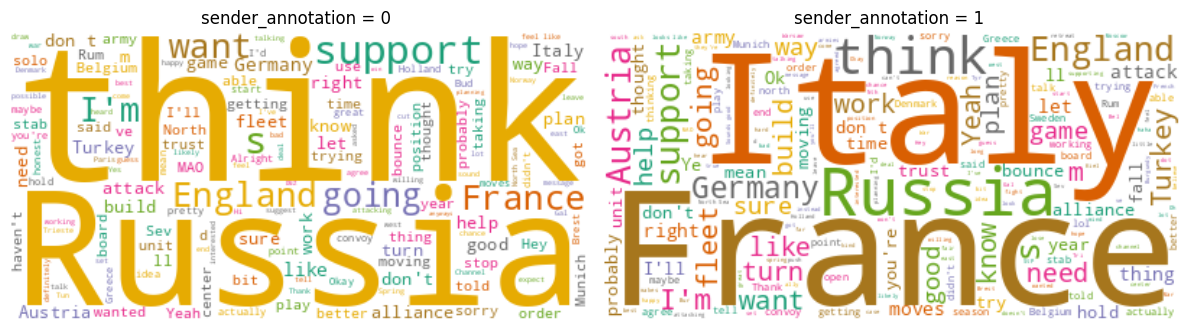

In [63]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, axes = plt.subplots(nrows=1, ncols=2)
flat_axes = axes.flat

for index in range(2):
    text_data = df_total_filtrado.query("sender_annotation==@index")['message']
    text = " ".join(riesgo for riesgo in text_data)

    flat_axes[index].imshow(wc.generate(text), interpolation="bilinear")
    flat_axes[index].axis("off")

    flat_axes[index].set_title(f"sender_annotation = {index} ")

fig.tight_layout()
plt.show()

### Se observa que las palabras que más se repiten so los paises del juego

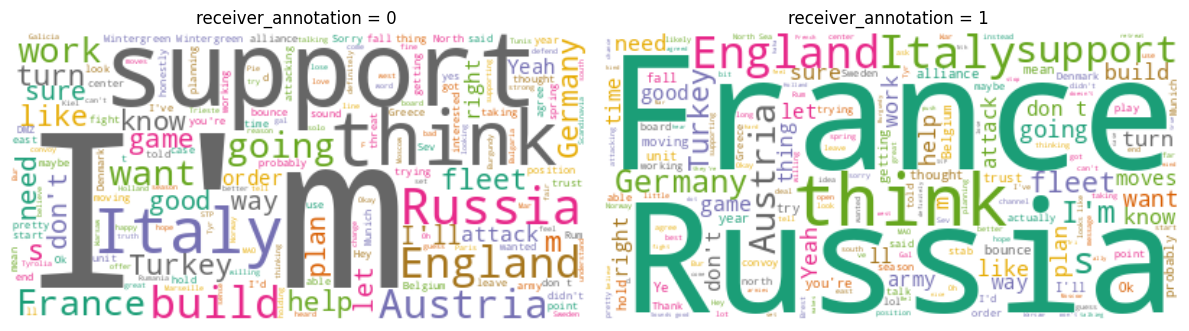

In [64]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, axes = plt.subplots(nrows=1, ncols=2)
flat_axes = axes.flat

for index in range(2):
    text_data = df_total_filtrado.query("receiver_annotation==@index")['message']
    text = " ".join(riesgo for riesgo in text_data)

    flat_axes[index].imshow(wc.generate(text), interpolation="bilinear")
    flat_axes[index].axis("off")

    flat_axes[index].set_title(f"receiver_annotation = {index} ")

fig.tight_layout()
plt.show()

## 3. Limpieza de datos

### Palabras menos frecuentes

In [65]:
df_count_words

,01,02,03,05,08,10,100,1000,100000,11,...,zine,zone,zones,zoning,zrussia,zzzzzzzzzzz,знает,хрен,receiver_annotation,sender_annotation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [66]:
list(df_count_words.columns[:200])

['01',
 '02',
 '03',
 '05',
 '08',
 '10',
 '100',
 '1000',
 '100000',
 '11',
 '110',
 '11th',
 '12',
 '13',
 '13hrs',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '1901',
 '1902',
 '1903',
 '1904',
 '1905',
 '1906',
 '1907',
 '1908',
 '1909',
 '1910',
 '1914',
 '1a',
 '1b',
 '1st',
 '20',
 '200',
 '2003',
 '2014',
 '2016',
 '24',
 '25',
 '250',
 '26',
 '2a',
 '2am',
 '2b',
 '2c',
 '2v1',
 '30',
 '30a',
 '30p',
 '3575755',
 '358278238675664896',
 '36',
 '3a',
 '3b',
 '3v2',
 '3x',
 '40',
 '45',
 '4d',
 '4v2',
 '4v3',
 '50',
 '530',
 '5538733581926400',
 '5637073032183808',
 '567829259054219275',
 '5727111032078336',
 '5th',
 '613143739954888734',
 '61940739',
 '6203125562605568',
 '6340894809128960',
 '730am',
 '730ish',
 '730pm',
 '7449927',
 '7p',
 '8th',
 '94',
 '945',
 '95',
 '9pm',
 '_____',
 '_and',
 '_anything_',
 '_us_',
 'aaaaaalllllllllll',
 'aaaaany',
 'aars',
 'aassume',
 'abandon',
 'abandoning',
 'abbreviation',
 'abide',
 'abiding',
 'ability',
 'able',
 'abondon',
 'abou

Realizar eliminación de números, caracteres especiales como:


In [67]:
df_count_words.sum(axis=0).sort_values(ascending=True).head(50)

lansing         1
inexperience    1
inexplicably    1
infamous        1
infantry        1
infer           1
inferior        1
inferred        1
inflexible      1
influencing     1
informative     1
infrequent      1
inherently      1
turb            1
initiative      1
injury          1
inked           1
innate          1
institute       1
instincts       1
instate         1
instantly       1
insists         1
insistent       1
inetrsts        1
insisted        1
insanly         1
ins             1
inquired        1
inot            1
innovative      1
innocence       1
insinuate       1
instituted      1
inefficient     1
inducing        1
importance      1
turncoat        1
imposed         1
imposing        1
imprecise       1
improved        1
improving       1
inbound         1
inbox           1
incase          1
incentives      1
incentivised    1
incentivized    1
inception       1
dtype: int64

In [68]:
list(df_count_words.columns[-200:])

['wham',
 'whassup',
 'whatcha',
 'whatev',
 'whatrecyou',
 'whats',
 'whatsoever',
 'whcih',
 'wheedled',
 'wheel',
 'whelp',
 'whet',
 'whew',
 'whichever',
 'whild',
 'whipe',
 'whispered',
 'whittling',
 'whoa',
 'wholeheartedly',
 'wholly',
 'whoops',
 'whoppers',
 'whore',
 'whupping',
 'whyever',
 'wick',
 'wide',
 'widely',
 'wierd',
 'wife',
 'wiki',
 'wild',
 'wildcard',
 'willfully',
 'willing',
 'willingly',
 'willingness',
 'win',
 'wind',
 'window',
 'winds',
 'wines',
 'wink',
 'winner',
 'winners',
 'winning',
 'wins',
 'winter',
 'wintergreen',
 'wipe',
 'wiped',
 'wiping',
 'wire',
 'wires',
 'wirh',
 'wise',
 'wisely',
 'wish',
 'wished',
 'wishes',
 'wishful',
 'wishing',
 'wishy',
 'witchcraft',
 'withdraw',
 'withdrawal',
 'withdrawing',
 'withdrew',
 'withing',
 'witness',
 'witnessed',
 'wizard',
 'wmed',
 'woah',
 'woke',
 'women',
 'womrth',
 'won',
 'wonder',
 'wonderful',
 'wondering',
 'wont',
 'woods',
 'wooo',
 'woooooo',
 'woops',
 'word',
 'worded',
 'w

## Ejecución de limpieza

In [69]:
import re
def limpiar_texto_1(texto):
    #convertiendo a minúsculas

    texto = texto.lower()

    #Eliminamos los caracteres especiales
    texto = re.sub(r'_', ' ', texto)
    texto = re.sub(r'll', ' ', texto)

    #eliminando sitios web
    pattern  = re.compile(r'(htt)\S+')
    texto = re.sub(pattern = pattern, repl= '',string = texto )
    pattern  = re.compile(r'(www)\S+')
    texto = re.sub(pattern = pattern, repl= '',string = texto )

    #Eliminación correos
    pattern = re.compile(r'\S*@\S*\s?')
    texto = re.sub(pattern = pattern, repl= '',string = texto )


    #eliminando números
    pattern  = re.compile(r'\w*\d\w*')
    texto = re.sub(pattern = pattern, repl= '',string = texto )
    pattern  = re.compile(r'\d+')
    texto = re.sub(pattern = pattern, repl= '',string = texto )


    #Sustituir los espacios en blanco en uno solo
    pattern  = re.compile(r'\s+')
    texto  = re.sub(pattern = pattern, repl= ' ',string = texto)

    #Eliminando espacios iniciales y finales
    texto = texto.rstrip().lstrip()
    return texto

#####################################################
#####################################################
#####################################################
#####################################################
#####################################################
#####################################################



def limpiar_datos(tipo_limpieza, df,datos):
    print("2.")
    if tipo_limpieza =='limpieza_1':
        print("limpieza_1 usada")
        return df[datos].apply(limpiar_texto_1)

    elif tipo_limpieza =='no':
        print("no limpieza usada")
        return df[datos]


In [70]:
df_total_filtrado['input'] = limpiar_datos(tipo_limpieza='limpieza_1',
                                           df = df_total_filtrado,
                                           datos = 'message')

2.
limpieza_1 usada


<ipython-input-70-2be8925916e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_filtrado['input'] = limpiar_datos(tipo_limpieza='limpieza_1',


In [71]:
df_total_filtrado.head(2)

,message,sender_annotation,receiver_annotation,score_delta,set,cantidad_palabras,input
0,Germany!\n\nJust the person I want to speak wi...,1,1,0,train,84,germany! just the person i want to speak with....
1,"You've whet my appetite, Italy. What's the sug...",1,1,0,train,8,"you've whet my appetite, italy. what's the sug..."


In [72]:
cv_clean = CountVectorizer(stop_words = list(stop_words) )

doc_term_matrix_clean = cv_clean.fit_transform(df_total_filtrado['input'])
df_count_words = pd.DataFrame(doc_term_matrix_clean.toarray(),
                       columns = cv_clean.get_feature_names_out())

df_count_words.index = df_total_filtrado.index
df_count_words.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


,aaaaaa,aaaaany,aars,aassume,abandon,abandoning,abbreviation,abic,abide,abiding,...,yup,yyou,zero,zone,zones,zoning,zrussia,zzzzzzzzzzz,знает,хрен
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Eliminando mensajes muy cortos (no aportantes)

In [73]:
df_total_filtrado.query("cantidad_palabras==1")

,message,sender_annotation,receiver_annotation,score_delta,set,cantidad_palabras,input
2,👍,1,1,0,train,1,👍
67,Ha!,1,1,2,train,1,ha!
99,Agreed,1,1,-2,train,1,agreed
143,🤗,1,1,3,train,1,🤗
195,Splendid!,1,1,-3,train,1,splendid!
...,...,...,...,...,...,...,...
2462,Alrighty,1,1,-2,test,1,alrighty
2480,Depends.,1,1,-2,test,1,depends.
2493,Interesting.,1,1,2,test,1,interesting.
2611,Alright,1,1,0,test,1,alright


## 4. Entrenamiento de modelo


## 4.1 Conversión de datos

### Entrenar con vector [1,1]

In [74]:
%%capture
!pip install transformers[torch]

In [75]:
%%capture
!pip install datasets

In [76]:
import torch
from datasets import Dataset, DatasetDict

In [77]:
df_total_para_modelo = df_total_filtrado[['input','sender_annotation','set']]

In [78]:
df_total_para_modelo['set'].unique()

array(['train', 'val', 'test'], dtype=object)

In [79]:
df_total_para_modelo.query(" set=='train' ").drop('set',axis=1)

,input,sender_annotation
0,germany! just the person i want to speak with....,1
1,"you've whet my appetite, italy. what's the sug...",1
2,👍,1
3,it seems like there are a lot of ways that cou...,1
7,"sorry italy i've been away doing, um, german t...",1
...,...,...
13127,is there any way of me actua y ending this con...,1
13128,can we agree on peace? what are your demands?,1
13129,"neutrality in exchange for current holdings, s...",1
13130,"thats a bit too much, can i keep spain and i h...",1


In [80]:
df_total_para_modelo.columns= ['text','label','set']

In [81]:
df_total_para_modelo.head(1)

,text,label,set
0,germany! just the person i want to speak with....,1,train


In [82]:
ds = DatasetDict(
      {
      "train": Dataset.from_pandas(df_total_para_modelo.query("set=='train'").drop('set',axis=1).reset_index(drop=True)  ) ,
      "valid": Dataset.from_pandas(df_total_para_modelo.query("set=='val'").drop('set',axis=1).reset_index(drop=True)),
      "test": Dataset.from_pandas(df_total_para_modelo.query("set=='test'").drop('set',axis=1).reset_index(drop=True))
      }
      )

In [83]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12025
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1283
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2475
    })
})

## Entrenamiento RoBERTa Ironia

In [84]:
from transformers import AutoTokenizer

In [85]:
# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='irony'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
model_ckpt = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [86]:

def tokenize(batch):
  '''
  Función para tokenizar todo el dataset
  padding: Para que en las oraciones que poseen menor
  tamaño que el máximo se les agregue 0's para que todas
  queden del mismo tamaño

  truncation: para que corte los valores mayores a 512 tokesn
  '''
  return tokenizer(batch['text'],
                   padding=True,
                   truncation = True)


In [87]:
ds_encoded = ds.map(tokenize,
                  batched = True,
                  batch_size = None)

Map:   0%|          | 0/12025 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1283 [00:00<?, ? examples/s]

Map:   0%|          | 0/2475 [00:00<?, ? examples/s]

In [88]:
ds_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 12025
    })
    valid: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1283
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2475
    })
})

In [89]:
from transformers import AutoModel,Trainer, TrainingArguments,AutoModelForSequenceClassification

In [90]:
device = torch.device('cuda' if
                      torch.cuda.is_available() else 'cpu')

In [91]:
num_labels = 2

model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels = num_labels)
        .to(device))

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [101]:
from sklearn.metrics import (f1_score,recall_score, precision_score,
                             classification_report,accuracy_score)

In [102]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  #argmax(-1) significa que va a realizar
  #la búsqueda del argumento máximo en el
  #último axis que sale cuando se ejecuta
  #.shape

  f1        = f1_score(labels, preds,average = 'macro')
  recall    = recall_score(labels, preds,average = 'macro')
  precision = precision_score(labels, preds ,average = 'macro')
  acc       = accuracy_score(labels, preds)

  return {'accuracy': acc, 'f1_score': f1,
          'recall':recall, 'precision': precision}

In [93]:
from transformers import Trainer, TrainingArguments

In [94]:
batch_size = 16
logging_steps = len(ds_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

logging_steps,model_name

(751, 'cardiffnlp/twitter-roberta-base-irony-finetuned-emotion')

In [129]:
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  disable_tqdm=False,
                                  load_best_model_at_end=True,
                                  metric_for_best_model='f1_score',
                                  evaluation_strategy="epoch",
                                  save_strategy="epoch",
                                  logging_strategy="epoch",
                                  save_total_limit=1
                                  )

In [96]:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["valid"],
                  tokenizer=tokenizer)

In [103]:
%%time
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score,Recall,Precision
1,0.141400,0.269767,0.952455,0.545756,0.533917,0.587067
2,0.083200,0.272958,0.954793,0.535284,0.525539,0.588624


Epoch,Training Loss,Validation Loss


CPU times: user 29min 41s, sys: 13.1 s, total: 29min 54s
Wall time: 30min 36s


TrainOutput(global_step=1504, training_loss=0.1124120083181782, metrics={'train_runtime': 1835.405, 'train_samples_per_second': 13.103, 'train_steps_per_second': 0.819, 'total_flos': 4698187060047600.0, 'train_loss': 0.1124120083181782, 'epoch': 2.0})

In [105]:
preds_train = trainer.predict(ds_encoded["train"])
preds_valid = trainer.predict(ds_encoded["valid"])
preds_test  = trainer.predict(ds_encoded["test"])

In [107]:
y_train = df_total_filtrado.query("set=='train'")['sender_annotation'].values
y_valid = df_total_filtrado.query("set=='val'")['sender_annotation'].values
y_test  = df_total_filtrado.query("set=='test'")['sender_annotation'].values

y_preds_train = np.argmax(preds_train.predictions, axis=1)
y_preds_val   = np.argmax(preds_valid.predictions, axis=1)
y_preds_test  = np.argmax(preds_test.predictions, axis=1)

print(classification_report(y_train,y_preds_train))
print(classification_report(y_valid,y_preds_val))
print(classification_report(y_test,y_preds_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       545
           1       0.99      1.00      1.00     11480

    accuracy                           0.99     12025
   macro avg       0.98      0.91      0.94     12025
weighted avg       0.99      0.99      0.99     12025

              precision    recall  f1-score   support

           0       0.21      0.06      0.09        50
           1       0.96      0.99      0.98      1233

    accuracy                           0.95      1283
   macro avg       0.59      0.53      0.54      1283
weighted avg       0.93      0.95      0.94      1283

              precision    recall  f1-score   support

           0       0.18      0.02      0.04       207
           1       0.92      0.99      0.95      2268

    accuracy                           0.91      2475
   macro avg       0.55      0.51      0.50      2475
weighted avg       0.86      0.91      0.88      2475



In [112]:
trainer.save_model("/content/drive/MyDrive/prueba_tecnica_bancolombia/Prueba practica/RoBERTa_irony")

In [92]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = [
    ]
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='irony'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [ ]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [95]:
text = "Great, it broke the first day..."
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores_1 = output[0][0].detach().numpy()
scores = softmax(scores_1)

In [96]:
scores, scores_1
#el primer

(array([0.08596174, 0.91403824], dtype=float32),
 array([-1.0298539,  1.3341161], dtype=float32))

In [97]:
ranking = np.argsort(scores)
ranking

array([0, 1])

In [99]:
ranking = ranking[::-1]
ranking

array([0, 1])

## EL primero es no ironia, el segundo es ironia

In [100]:
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) non_irony 0.086
2) irony 0.914


## Modelo RoBERTa + pesos

Como se está enfrentando a un problema de muestras desbalanceadas se agregan pesos a la función de coste para priorizar las predicciones de las mentiras

In [113]:
from torch import nn

In [130]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  #argmax(-1) significa que va a realizar
  #la búsqueda del argumento máximo en el
  #último axis que sale cuando se ejecuta
  #.shape

  f1        = f1_score(labels, preds,average = 'macro')
  recall    = recall_score(labels, preds,average = 'macro')
  precision = precision_score(labels, preds ,average = 'macro')
  acc       = accuracy_score(labels, preds)

  return {'accuracy': acc, 'f1_score': f1,
          'recall':recall, 'precision': precision}

# CAMBIAR ORDER PESOS

In [140]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        peso_verdad  = 4.0
        peso_mentira = 1.0
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([peso_mentira,peso_verdad], device=model.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [138]:
custom_trainer = CustomTrainer(
    model=model,tokenizer=tokenizer,
    args=training_args,
    train_dataset=ds_encoded["train"],
    eval_dataset=ds_encoded["valid"],
    compute_metrics=compute_metrics
)

In [139]:
custom_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score,Recall,Precision
1,0.012000,0.262658,0.936867,0.538581,0.535401,0.542860
2,0.014200,0.123183,0.954793,0.505094,0.506350,0.530754
3,0.007900,0.172759,0.945440,0.512982,0.511079,0.522604


TrainOutput(global_step=2256, training_loss=0.01138840562908362, metrics={'train_runtime': 2739.2575, 'train_samples_per_second': 13.17, 'train_steps_per_second': 0.824, 'total_flos': 7044644340630000.0, 'train_loss': 0.01138840562908362, 'epoch': 3.0})

In [118]:
preds_train = custom_trainer.predict(ds_encoded["train"])
preds_valid = custom_trainer.predict(ds_encoded["valid"])
preds_test  = custom_trainer.predict(ds_encoded["test"])

In [119]:
y_train = df_total_filtrado.query("set=='train'")['sender_annotation'].values
y_valid = df_total_filtrado.query("set=='val'")['sender_annotation'].values
y_test  = df_total_filtrado.query("set=='test'")['sender_annotation'].values

y_preds_train = np.argmax(preds_train.predictions, axis=1)
y_preds_val   = np.argmax(preds_valid.predictions, axis=1)
y_preds_test  = np.argmax(preds_test.predictions, axis=1)

print(classification_report(y_train,y_preds_train))
print(classification_report(y_valid,y_preds_val))
print(classification_report(y_test,y_preds_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       545
           1       1.00      1.00      1.00     11480

    accuracy                           1.00     12025
   macro avg       0.99      0.97      0.98     12025
weighted avg       1.00      1.00      1.00     12025

              precision    recall  f1-score   support

           0       0.13      0.04      0.06        50
           1       0.96      0.99      0.98      1233

    accuracy                           0.95      1283
   macro avg       0.55      0.51      0.52      1283
weighted avg       0.93      0.95      0.94      1283

              precision    recall  f1-score   support

           0       0.14      0.02      0.04       207
           1       0.92      0.99      0.95      2268

    accuracy                           0.91      2475
   macro avg       0.53      0.51      0.50      2475
weighted avg       0.85      0.91      0.87      2475



In [ ]:
custom_trainer.save_model("/content/drive/MyDrive/prueba_tecnica_bancolombia/Prueba practica")

### Conclusiones

Añadir pesos a la función de pérdida no hizo que se incrementara las métricas. al contrario decrecieron.

## GPT-2 SMALL

Probando la clasificación mediante un modelo autoregresivo

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
def creacion_input(mensaje,label):
  map_label = {0:'lie', 1: 'truth'}
  input = f' Message: {mensaje} \n intention: {map_label[label]}'
  return input

def creacion_prompt(mensaje,label):
  map_label = {0:'lie', 1: 'truth'}
  input = f' Message: {mensaje} \n intention: '
  return input

In [ ]:
df_total_para_modelo.columns

Index(['text', 'label', 'set', 'input', 'prompt'], dtype='object')

In [ ]:
df_total_para_modelo['input'] = df_total_para_modelo.apply(lambda x: creacion_input(x.text, x.label) ,
                                          axis = 1 )

<ipython-input-185-9e7e2a1716ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_para_modelo['input'] = df_total_para_modelo.apply(lambda x: creacion_input(x.text, x.label) ,


In [ ]:
df_total_para_modelo['prompt'] = df_total_para_modelo.apply(lambda x: creacion_prompt(x.text, x.label) ,
                                          axis = 1 )

<ipython-input-186-87c300bc78e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_para_modelo['prompt'] = df_total_para_modelo.apply(lambda x: creacion_prompt(x.text, x.label) ,


In [ ]:
df_total_para_modelo.iloc[0]['input']

' Message: germany! just the person i want to speak with. i have a somewhat crazy idea that i’ve always wanted to try with i/g, but i’ve never actua y convinced the other guy to try it. and, what’s worse, it might make you suspicious of me. so...do i suggest it? i’m thinking that this is a low stakes game, not a tournament or anything, and an interesting and unusual move set might make it more fun? that’s my hope anyway. what is your appetite like for unusual and crazy? \n intention: truth'

In [ ]:
df_train_para_modelo = df_total_para_modelo.query("set=='train'")
df_train_para_modelo

,text,label,set,input,prompt
0,germany! just the person i want to speak with....,1,train,Message: germany! just the person i want to s...,Message: germany! just the person i want to s...
1,"you've whet my appetite, italy. what's the sug...",1,train,"Message: you've whet my appetite, italy. what...","Message: you've whet my appetite, italy. what..."
2,👍,1,train,Message: 👍 \n intention: truth,Message: 👍 \n intention:
3,it seems like there are a lot of ways that cou...,1,train,Message: it seems like there are a lot of way...,Message: it seems like there are a lot of way...
7,"sorry italy i've been away doing, um, german t...",1,train,"Message: sorry italy i've been away doing, um...","Message: sorry italy i've been away doing, um..."
...,...,...,...,...,...
13127,is there any way of me actua y ending this con...,1,train,Message: is there any way of me actua y endin...,Message: is there any way of me actua y endin...
13128,can we agree on peace? what are your demands?,1,train,Message: can we agree on peace? what are your...,Message: can we agree on peace? what are your...
13129,"neutrality in exchange for current holdings, s...",1,train,Message: neutrality in exchange for current h...,Message: neutrality in exchange for current h...
13130,"thats a bit too much, can i keep spain and i h...",1,train,"Message: thats a bit too much, can i keep spa...","Message: thats a bit too much, can i keep spa..."


In [ ]:
df_val_para_modelo  = df_total_para_modelo.query("set=='val'")
df_test_para_modelo = df_total_para_modelo.query("set=='test'")

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler,SequentialSampler
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
model_name = "gpt2"
# seed
torch.manual_seed(42)

# load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name, bos_token='<|startoftext|>',
                                          eos_token='<|endoftext|>', pad_token='<|pad|>')
model = AutoModelForCausalLM.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))

Embedding(50259, 768)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device) #Importante para que funcione

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50259, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50259, bias=False)
)

In [ ]:
batch_size = 8

In [ ]:
class GPT2Dataset(Dataset):

  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=512):

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list:

      encodings_dict = tokenizer('<|startoftext|> '+ txt + ' <|endoftext|>', truncation=True,
                                 max_length=max_length, padding="max_length")

      self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx]

In [ ]:
train_dataset = GPT2Dataset(df_train_para_modelo['input'], tokenizer, max_length=512)
val_dataset   = GPT2Dataset(df_val_para_modelo['input'], tokenizer, max_length=512)

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
training_args = TrainingArguments(output_dir='path_resultados',
                                  num_train_epochs=1,
                                  logging_steps=100,  # Number of update steps between two logs if logging_strategy="steps"
                                  #save_steps=5000,
                                  learning_rate = 5E-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  lr_scheduler_type = 'linear',
                                  warmup_steps = 100,
                                  load_best_model_at_end=True,
                                  save_total_limit=1 , # If a value is passed, will limit the total amount of checkpoints. Deletes the older checkpoints in output_dir.
                                  evaluation_strategy = 'steps',
                                  save_strategy = 'steps',
                                  gradient_accumulation_steps=2)


In [ ]:
# start training
trainer = Trainer(model=model,  args=training_args, train_dataset=train_dataset,
        eval_dataset=val_dataset, data_collator=lambda data: {'input_ids': torch.stack([f[0] for f in data]),
                                                              'attention_mask': torch.stack([f[1] for f in data]),
                                                              'labels': torch.stack([f[0] for f in data])})

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
100,2.191600,0.199461
200,0.217500,0.174000
300,0.206900,0.167647
400,0.203200,0.164989
500,0.208300,0.162793
600,0.196700,0.161728
700,0.202600,0.161051


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=752, training_loss=0.4690008061997434, metrics={'train_runtime': 2441.4939, 'train_samples_per_second': 4.925, 'train_steps_per_second': 0.308, 'total_flos': 3142036684800000.0, 'train_loss': 0.4690008061997434, 'epoch': 1.0})

In [ ]:
trainer.save_model("/content/drive/MyDrive/prueba_tecnica_bancolombia/Prueba practica/modelos/GPT2")

### Evaluación del modelo



In [ ]:
df_val_para_modelo.reset_index(inplace=True, drop=True)

In [ ]:
df_val_para_modelo[df_val_para_modelo['label']==0]

,level_0,index,text,label,set,input,prompt
162,162,163,"neither of us have a good reason to stab you, ...",0,val,Message: neither of us have a good reason to ...,Message: neither of us have a good reason to ...
164,164,165,"i’ do that, it keeps turkey from snagging gre",0,val,"Message: i’ do that, it keeps turkey from sna...","Message: i’ do that, it keeps turkey from sna..."
166,166,167,"so am i, i’d expect they go through me before ...",0,val,"Message: so am i, i’d expect they go through ...","Message: so am i, i’d expect they go through ..."
285,285,304,"i would say trieste, greece to me, and then se...",0,val,"Message: i would say trieste, greece to me, a...","Message: i would say trieste, greece to me, a..."
309,309,333,"on the other hand, i’m not sure i want to atta...",0,val,"Message: on the other hand, i’m not sure i wa...","Message: on the other hand, i’m not sure i wa..."
366,366,404,i also thought i would let you know that i hea...,0,val,Message: i also thought i would let you know ...,Message: i also thought i would let you know ...
367,367,405,so... i guess your new? what do you think abou...,0,val,Message: so... i guess your new? what do you ...,Message: so... i guess your new? what do you ...
383,383,421,"while that might be true, what would you sugge...",0,val,"Message: while that might be true, what would...","Message: while that might be true, what would..."
391,391,429,i am wi ing to concede it to you if you cooper...,0,val,Message: i am wi ing to concede it to you if ...,Message: i am wi ing to concede it to you if ...
392,392,430,"hmm. i messaged austria, and they didn't respo...",0,val,"Message: hmm. i messaged austria, and they di...","Message: hmm. i messaged austria, and they di..."


In [ ]:
model.eval()
index = 1224
prompt_inicial =  df_val_para_modelo.iloc[index]['prompt'] #'the australians? are they landing at galipoli?	 '#df_val_para_modelo.iloc[index]['prompt']
input      = df_val_para_modelo.iloc[index]['input']

prompt = f"<|startoftext|> {prompt_inicial}"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)
longitud  = len(tokenizer.encode(prompt))
sample_outputs = model.generate(
                                generated,
                                do_sample=False,
                                min_length = longitud+2,
                                max_length = longitud + 20,
                                num_return_sequences=1,
                                pad_token_id = tokenizer.eos_token_id
                                )

output = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)

In [ ]:
print(output)
print("\n")
print(input)


  Message: ok, i didn't think germany would betray me but they did. no matter what situation your in, we have to a start working together to stop germany or they wi win. 
 intention: 
 intention: truth 


 Message: ok, i didn't think germany would betray me but they did. no matter what situation your in, we have to a start working together to stop germany or they wi win. 
 intention: lie


In [ ]:
input.split(" ")[-1]

'lie'

In [ ]:
output.split(" ")[-2]

'truth'

In [ ]:
df_total_para_modelo.shape

(15783, 5)

In [ ]:
diccionario_cambio_string2numero = {'truth':1,'lie':0}
predicciones    = []
valores_reales  = []

for index in range(0, df_val_para_modelo.shape[0]):
  print(index)
  model.eval()
  prompt_inicial =  df_val_para_modelo.iloc[index]['prompt'] #'the australians? are they landing at galipoli?	 '#df_val_para_modelo.iloc[index]['prompt']
  input          = df_val_para_modelo.iloc[index]['input']

  prompt = f"<|startoftext|> {prompt_inicial}"

  generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
  generated = generated.to(device)
  longitud  = len(tokenizer.encode(prompt))
  sample_outputs = model.generate(
                                  generated,
                                  do_sample=False,
                                  min_length = longitud+2,
                                  max_length = longitud + 20,
                                  num_return_sequences=1,
                                  pad_token_id = tokenizer.eos_token_id
                                  )

  output = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)

  real       = input.split(" ")[-1]
  prediccion = output.split(" ")[-2]

  if prediccion!='truth' and prediccion!='lie':
    print("bad###########", index)
    continue
  else:
    predicciones.append(diccionario_cambio_string2numero[prediccion] )
    valores_reales.append(diccionario_cambio_string2numero[real] )
    print('prediccion:', prediccion, " valor real: ", real)



0
prediccion: truth  valor real:  truth
1
prediccion: truth  valor real:  truth
2
prediccion: truth  valor real:  truth
3
prediccion: truth  valor real:  truth
4
prediccion: truth  valor real:  truth
5
prediccion: truth  valor real:  truth
6
prediccion: truth  valor real:  truth
7
prediccion: truth  valor real:  truth
8
prediccion: truth  valor real:  truth
9
prediccion: truth  valor real:  truth
10
prediccion: truth  valor real:  truth
11
prediccion: truth  valor real:  truth
12
prediccion: truth  valor real:  truth
13
prediccion: truth  valor real:  truth
14
prediccion: truth  valor real:  truth
15
prediccion: truth  valor real:  truth
16
prediccion: truth  valor real:  truth
17
prediccion: truth  valor real:  truth
18
prediccion: truth  valor real:  truth
19
prediccion: truth  valor real:  truth
20
prediccion: truth  valor real:  truth
21
prediccion: truth  valor real:  truth
22
prediccion: truth  valor real:  truth
23
prediccion: truth  valor real:  truth
24
prediccion: truth  valo

In [ ]:
from sklearn.metrics import (classification_report,accuracy_score,
                             f1_score, recall_score, precision_score,
                             jaccard_score)

In [ ]:
print(classification_report(valores_reales,predicciones))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.96      1.00      0.98      1231

    accuracy                           0.96      1281
   macro avg       0.48      0.50      0.49      1281
weighted avg       0.92      0.96      0.94      1281



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
diccionario_cambio_string2numero = {'truth':1,'lie':0}
predicciones    = []
valores_reales  = []

for index in range(0, df_test_para_modelo.shape[0]):
  print(index)
  model.eval()
  prompt_inicial =  df_test_para_modelo.iloc[index]['prompt'] #'the australians? are they landing at galipoli?	 '#df_test_para_modelo.iloc[index]['prompt']
  input          = df_test_para_modelo.iloc[index]['input']

  prompt = f"<|startoftext|> {prompt_inicial}"

  generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
  generated = generated.to(device)
  longitud  = len(tokenizer.encode(prompt))
  sample_outputs = model.generate(
                                  generated,
                                  do_sample=False,
                                  min_length = longitud+2,
                                  max_length = longitud + 20,
                                  num_return_sequences=1,
                                  pad_token_id = tokenizer.eos_token_id
                                  )

  output = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)

  real       = input.split(" ")[-1]
  prediccion = output.split(" ")[-2]

  if prediccion!='truth' and prediccion!='lie':
    print("bad###########", index)
    continue
  else:
    predicciones.append(diccionario_cambio_string2numero[prediccion] )
    valores_reales.append(diccionario_cambio_string2numero[real] )
    print('prediccion:', prediccion, " valor real: ", real)



0
prediccion: truth  valor real:  truth
1
prediccion: truth  valor real:  truth
2
prediccion: truth  valor real:  truth
3
prediccion: truth  valor real:  truth
4
prediccion: truth  valor real:  truth
5
prediccion: truth  valor real:  truth
6
prediccion: truth  valor real:  truth
7
prediccion: truth  valor real:  lie
8
prediccion: truth  valor real:  truth
9
prediccion: truth  valor real:  truth
10
prediccion: truth  valor real:  truth
11
prediccion: truth  valor real:  truth
12
prediccion: truth  valor real:  truth
13
prediccion: truth  valor real:  truth
14
prediccion: truth  valor real:  truth
15
prediccion: truth  valor real:  truth
16
prediccion: truth  valor real:  truth
17
prediccion: truth  valor real:  truth
18
prediccion: truth  valor real:  truth
19
prediccion: truth  valor real:  truth
20
prediccion: truth  valor real:  truth
21
prediccion: truth  valor real:  truth
22
prediccion: truth  valor real:  truth
23
prediccion: truth  valor real:  truth
24
prediccion: truth  valor 

In [ ]:
print(classification_report(valores_reales,predicciones))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.92      1.00      0.96      2258

    accuracy                           0.92      2461
   macro avg       0.46      0.50      0.48      2461
weighted avg       0.84      0.92      0.88      2461



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
